![](../docs/banner.png)

# Appendix A: Gradients Review

## Introduction
<hr>

This short appendix provides a refresher on gradients and calculus. Some of you may never have seen gradients before. Multivariate calculus is not a required prerequisite for the MDS program but it will be helpful to know for this course, so we'll cover the basics in this appendix. This material has been modified after material originally created by [Mike Gelbart](https://www.mikegelbart.com/).

## Imports
<hr>

In [6]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'axes.grid': False,
                     'figure.figsize': (8,6)})

## 1. Ingredient 1: Functions of Multiple Variables
<hr>

- We can write such a function as $f(x,y,z)$ (for 3 inputs) or $f(x)$ if $x$ is a vector.
- Example: $f(x,y,z) = x^2 + y^2 + e^z + x^z + xyz$.

In [7]:
def f(x, y, z):
    return x**2 + y**2 + np.exp(z) + np.power(x,z) + x*y*z

f(1,2,3)

32.08553692318767

- Another example: $f(x,y) = \sin(xy)$
- We can visualize functions of two variables, but it gets much harder after that.

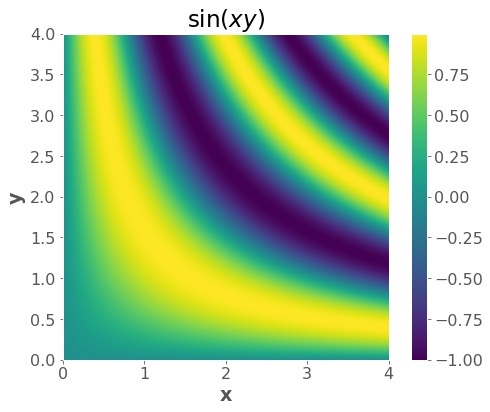

In [8]:
f = lambda x, y: np.sin(x * y)

x = np.linspace(0, 4, 1000)
y = np.linspace(0, 4, 1000)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

plt.imshow(zz, extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin="lower")
plt.xlabel("x")
plt.ylabel("y")
plt.title("$\sin(xy)$")
plt.colorbar();

## 2. Ingredient 2: Vector-valued Functions
<hr>

- These are functions with multiple _outputs_ (and may or may not have multiple _inputs_).
- Example with 1 input and 3 outputs:

$$f(x)=\begin{bmatrix} x^2 \\ 2x \\ -x\end{bmatrix}$$

- Example with 3 inputs and 4 outputs:

$$f(x,y,z)=\begin{bmatrix} yz^2 \\ 0 \\ xyz \\ x-y\end{bmatrix}$$

- Example with 2 inputs and 2 outputs:

$$f(x,y)=\begin{bmatrix} x \\ \sin(y) \end{bmatrix}$$

In [9]:
def f(x, y):
    return np.array([x, np.sin(y)])


f(2, 10)

array([ 2.        , -0.54402111])

- We can visualize functions with two outputs (and two inputs), but it gets much harder after that.

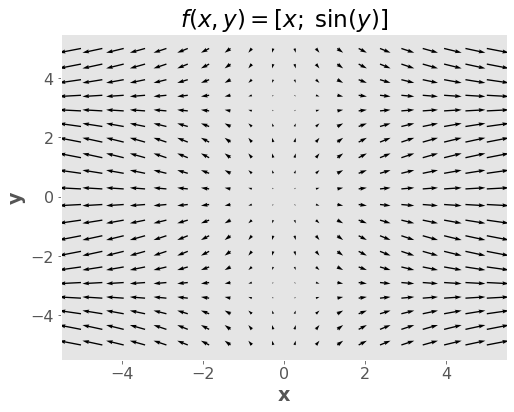

In [10]:
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

plt.quiver(xx, yy, zz[0], zz[1])
# plt.axis('square');
plt.xlabel("x")
plt.ylabel("y")
plt.title("$f(x,y) = [x; \; \sin(y)]$")
plt.show()

Notes:

- For a fixed $y$, when $x$ grows, the $x$-component of the output grows (horizontal length of the arrows)
- A similar argument can be made for $y$.
- It's not always the case that the number of inputs equals the number of outputs - this is a special case!
  - But it's a very important special case, as we'll see below.
  - What it means is that the "input space" and the "output space" are the same.
  - Which allows for this kind of visualization.
- (optional) It's not always the case that the $i$th component of the output depends on the $i$th component of the inputs - this is also a special case!

## 3. Ingredient 3: Partial Derivatives
<hr>

- A partial derivative is just a derivative of a multivariable function with respect to one of the input variables.
- When taking this derivative, we treat all the other variables as constants.
- Example: let $f(x,y,z) = x^2 + y^2 + e^x + x^z + xyz$, let's compute $\frac{\partial}{\partial x} f(x,y,z)$

$$\begin{align}\frac{\partial}{\partial x} \quad &x^2 &+ \quad &y^2 &+ \quad &e^x &+ \quad &x^z &+ \quad &xyz\\=\quad &2x &+ \quad &0 &+\quad  &e^x &+ \quad &zx^{z-1} &+ \quad &yz\end{align}$$

- **Important note**: $\frac{\partial f}{\partial x} $ is itself a function of $x,y,z$, not just a function of $x$. Think about the picture from the PDF slide above: the slope depends on your position in all coordinates.
- (optional) Thus, the partial derivative operator $\frac{\partial}{\partial x}$ maps from multivariate functions to multivariable functions.

## 4. Ingredient 4: Gradients
<hr>

- This is the easy part: a gradient is just a box holding all the $d$ partial derivatives (assuming you have a function of $d$ variables). For example, when $d=3$:
 
$$\nabla f(x,y,z)=\begin{bmatrix}\frac{\partial f}{\partial x}(x,y,z)\\ \frac{\partial f}{\partial y}(x,y,z) \\\frac{\partial f}{\partial z}(x,y,z)\end{bmatrix}$$

- Or, more generally, if $x$ is a vector then

$$\nabla f(x)=\begin{bmatrix}\frac{\partial f}{\partial x_1}(x)\\ \frac{\partial f}{\partial x_2}(x) \\ \vdots \\ \frac{\partial f}{\partial x_d}(x)\end{bmatrix}$$


- (optional) Thus, a partial derivative is a function that has the same mapping as the original, e.g. $\mathbb{R}^3\rightarrow \mathbb{R}$ ("R three to R").
- (optional) a gradient is a function that maps from the original input space to the same space, e.g. $\mathbb{R}^3\rightarrow \mathbb{R}^3$ ("R three to R three").

**Notation warning**: we use the term "derivative" or "gradient" to mean three different things:

1. Operator (written $\frac{d}{dx}$ or $\nabla$), which maps **functions to functions**; "now we take the gradient".
2. Function (written $\frac{df}{dx}$ or $\nabla f$), which maps **vectors to vectors**; "the gradient is $2x+5$"
    - This is what you get after applying the operator to a function.
3. Value (written as a number or vector), which is **just a number or vector**; "the gradient is  $\begin{bmatrix}-2.34\\6.43\end{bmatrix}$"
    - This is what you get after applying the function to an input.
  
This is extremely confusing!

Here's a table summarizing the situation, assuming 3 variables (in general it could be any number)

|  Name   | Operator | Function | Maps  | Example Value  |
|---------|----------|-----------|------|----------|
| Derivative | $\frac{d}{dx}$ | $\frac{df}{dx}(x)$ | $\mathbb{R}\rightarrow \mathbb{R}$ | $2.5$ |
| Partial Derivative |  ${\frac{\partial}{\partial x}}$ |  ${\frac{\partial f}{\partial x}}(x,y,z)$ | ${\mathbb{R}^3\rightarrow \mathbb{R}}$ | $2.5$ |
| Gradient |  $\nabla$ | $\nabla f(x,y,z)$ |$\mathbb{R}^3\rightarrow \mathbb{R}^3$ | $\begin{bmatrix}2.5\\0\\-1\end{bmatrix}$ |

### 4.1 Gradients intuition

Since a gradient is a vector, we can talk about its magnitude and direction.
  - The magnitude is $\|\nabla f\|$ and tells us **how fast things are changing**.
  - The direction is $\frac{\nabla f}{\|\nabla f \|}$ and tells us **the direction of fastest change** or the steepest direction.

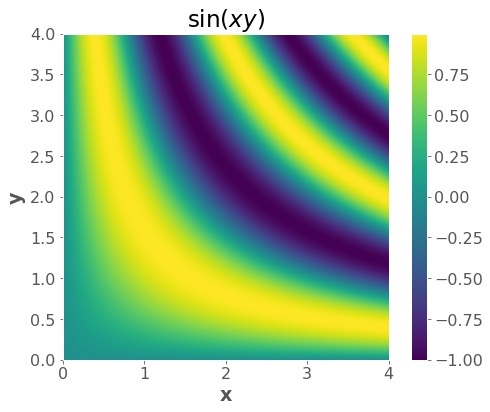

In [11]:
# gradient vector field
f = lambda x, y: np.sin(x * y)

x = np.linspace(0, 4, 1000)
y = np.linspace(0, 4, 1000)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

plt.imshow(zz, extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin="lower")
plt.xlabel("x")
plt.ylabel("y")
plt.title("$\sin(xy)$")
plt.colorbar();

$$\nabla \sin(xy) = \begin{bmatrix} y \cos(xy)\\x\cos(xy)\end{bmatrix}$$

In [16]:
gradf = lambda x, y: (y * np.cos(x * y), x * np.cos(x * y))

xsmall = np.linspace(0, 4, 15)
ysmall = np.linspace(0, 4, 15)
xxsmall, yysmall = np.meshgrid(xsmall, ysmall)
gradx, grady = gradf(xxsmall, yysmall)

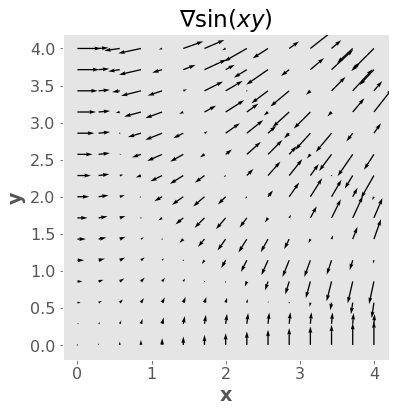

In [13]:
plt.quiver(xxsmall, yysmall, gradx, grady)
plt.axis("square")
plt.xlabel("x")
plt.ylabel("y")
plt.title("∇$ \sin(xy)$");

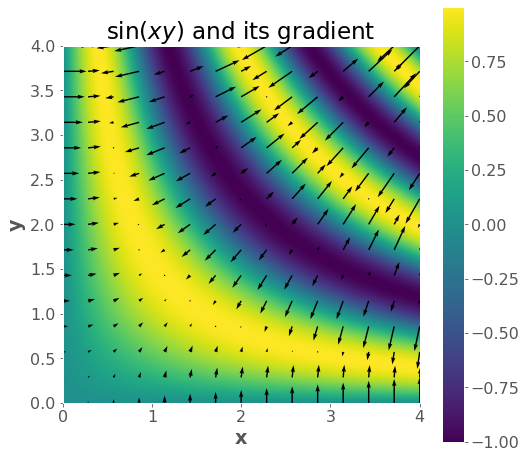

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(zz,extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin='lower')
plt.colorbar();
plt.quiver(xxsmall,yysmall,gradx,grady);
plt.xlabel("x")
plt.ylabel("y")
plt.title("$\sin(xy)$ and its gradient");

### 4.2 Why is it the direction of fastest increase?

For example if the gradient is:

$$\begin{bmatrix} 5 \\ 2 \\ -1 \\ 0 \end{bmatrix}\, ,$$

why go in the gradient direction instead of the $x_1$ direction, since that first component has the biggest partial derivative. Doesn't it seem wasteful to go partly in those other directions?

First, a proof that the gradient is the best direction. Let's say we are at position $x$ and we move by an infinitesimal (i.e. extremely tiny) $v$, which is a vector having components $v_1, v_2, \ldots v_d$. The change in $f$ from moving from $x$ to $x+v$ is $\frac{\partial f}{dx_1} v_1 + \frac{\partial f}{dx_2} v_2 + \ldots \frac{\partial f}{dx_d} v_d$, where all the partial derivatives are evaluated at $x$ (I believe this is related to the "total derivative"). In other words, the change in $f$ is the dot product $\nabla f \cdot v$. So now the question is, what vector $v$ of fixed length maximizes $\nabla f \cdot v$. The answer is a vector that points in the same direction as $\nabla f$. (That's a property of the dot product, and is evident by the definition: $a \cdot b = \| a \| \|b \| \cos(\theta)$. Since $\| \nabla f \|$ and $\|v\|$ are fixed in our case, to maximize this we want to maximize $\cos(\theta)$, which means we want $\cos(\theta)=1$ meaning $\theta=0$, or the angle between the vectors is $0$).

Second, the intuition. I think the "paradox" comes from over-privileging the coordinate axes. They are not special in any way! For example if you rotate the coordinate system by 45 degrees, the direction of steepest ascent should also rotate by 45 degrees. Under the suggested system, this would not happen. Why? Well, there is always going to be one element of the gradient that is largest. Does that mean the direction of steepest ascent is always one of the coordinate axis directions? No. That doesn't make sense and also fails the "rotate by 45 degrees test" because the direction will have rotated by 0, 90, 180 or 270 degrees.
